In [42]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv(r"C:\Users\kumar\Desktop\Spam_classifier_Ml\spam.csv",encoding='latin')

In [44]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [46]:
df.drop(columns=[ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [47]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [48]:
df.isnull().sum().sum()

np.int64(0)

In [49]:
df.duplicated().sum()

np.int64(403)

In [50]:
df.drop_duplicates()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()
df['v1']=le.fit_transform(df['v1'])

In [53]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [54]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

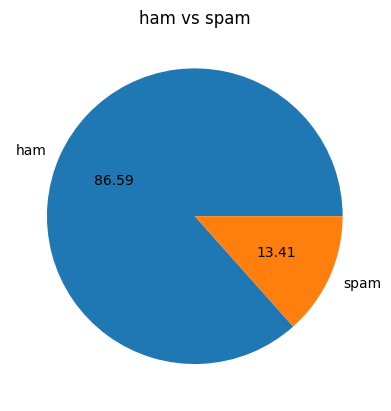

In [55]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.title("ham vs spam")
plt.show()

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
df['num_characters']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<Axes: xlabel='num_characters', ylabel='Count'>

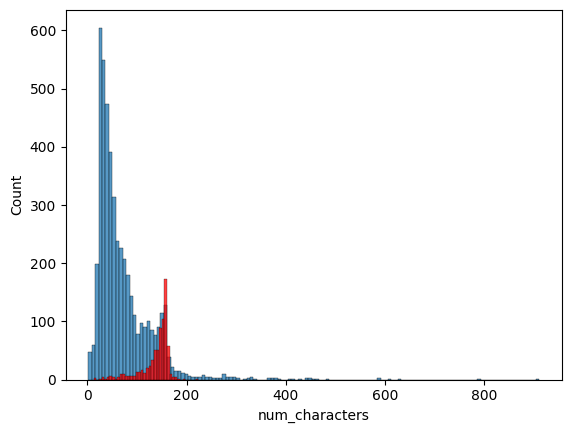

In [58]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

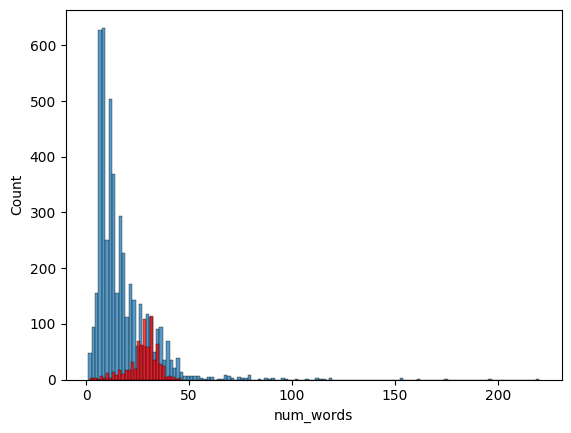

In [59]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

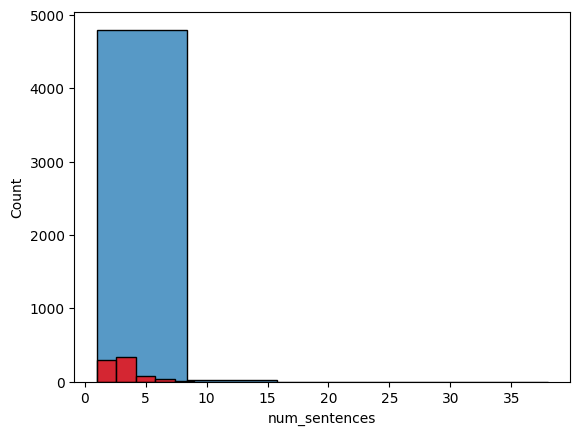

In [60]:
sns.histplot(df[df['target']==0]['num_sentences'],bins=5)
sns.histplot(df[df['target']==1]['num_sentences'],color='red',bins=5)

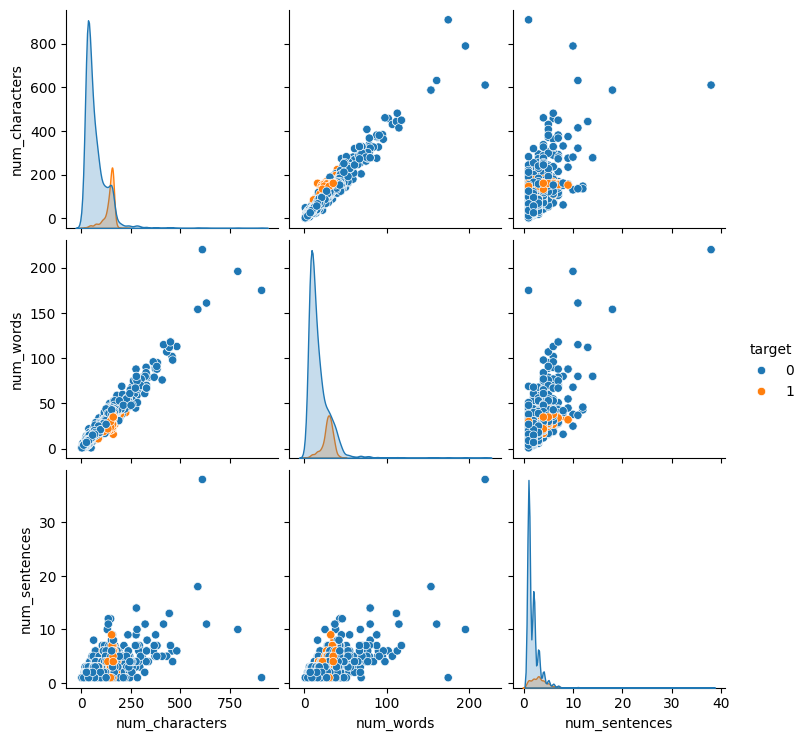

In [61]:
sns.pairplot(df,hue='target')

In [62]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [63]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

    

def transform_text(text):
    # Lowercase
    text = text.lower()
    text=nltk.word_tokenize(text)
    top_words = set(stopwords.words('english'))
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in top_words and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
        



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [64]:
transform_text('Hello how are you? I am doing good!')

'hello good'

In [65]:
df['transformed_text']=df['text'].apply(transform_text)

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


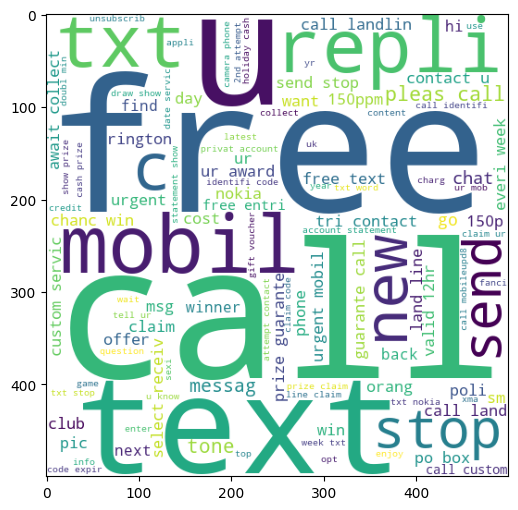

In [67]:
from wordcloud import WordCloud
plt.figure(figsize=(15,6))
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

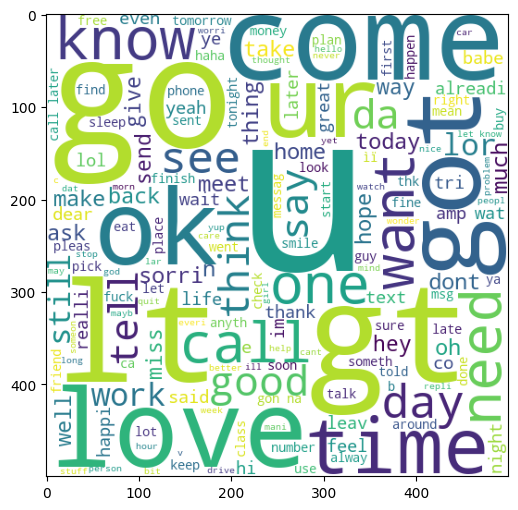

In [68]:

plt.figure(figsize=(15,6))

ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [69]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

11490

In [70]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

38221

<Axes: ylabel='0'>

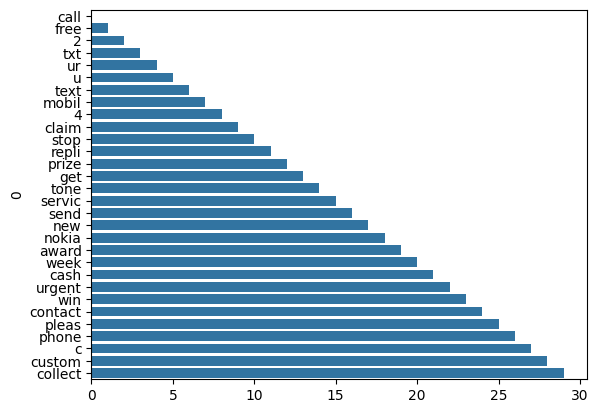

In [71]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])





<Axes: ylabel='0'>

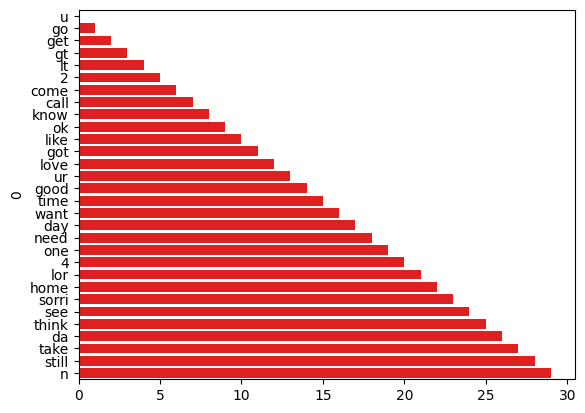

In [72]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],color='red')

# vactorize of words

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(min_df=2,max_df=0.9,ngram_range=(1,2))
X=tfid.fit_transform(df['transformed_text']).toarray()

In [74]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5572, 8891))

In [75]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB


In [77]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [78]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)  
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)      
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("GaussianNB")
print(accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_gnb))
print("Precision, Recall and F1 Score")
print(classification_report(y_test,y_pred_gnb))



GaussianNB
0.9183856502242153
Confusion Matrix
[[892  65]
 [ 26 132]]
Precision, Recall and F1 Score
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       957
           1       0.67      0.84      0.74       158

    accuracy                           0.92      1115
   macro avg       0.82      0.88      0.85      1115
weighted avg       0.93      0.92      0.92      1115



In [79]:
print("MultinomialNB")
print(accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_mnb))
print("Precision, Recall and F1 Score")
print(classification_report(y_test,y_pred_mnb))

MultinomialNB
0.9614349775784753
Confusion Matrix
[[957   0]
 [ 43 115]]
Precision, Recall and F1 Score
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       957
           1       1.00      0.73      0.84       158

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [80]:
print("BernoulliNB")
print(accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_bnb))
print("Precision, Recall and F1 Score")
print(classification_report(y_test,y_pred_bnb))


BernoulliNB
0.9587443946188341
Confusion Matrix
[[952   5]
 [ 41 117]]
Precision, Recall and F1 Score
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       957
           1       0.96      0.74      0.84       158

    accuracy                           0.96      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
import pickle 
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

: 